In [1]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np


In [2]:
best_model = YOLO("yolo_MODEL_leaf_blight.pt")

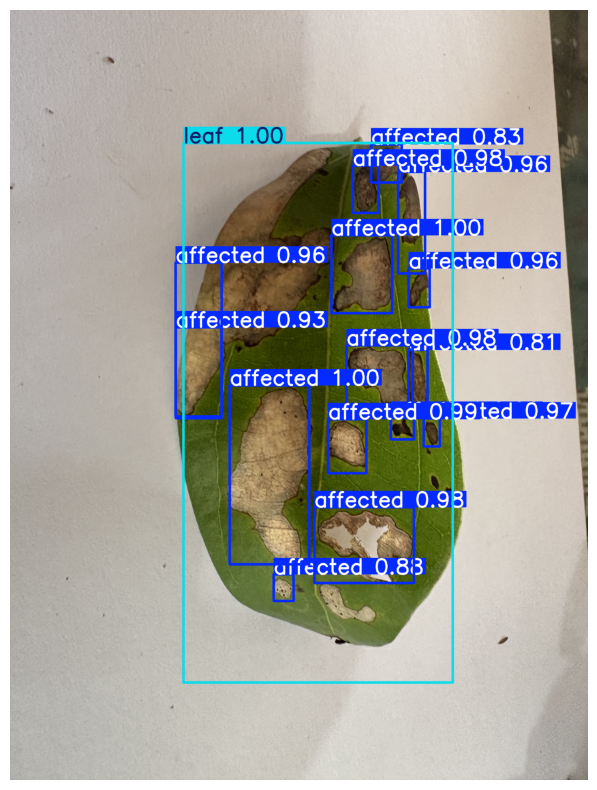

In [3]:
results = best_model.predict(source="testdata\\Leaf Blight\\fdbdf904-IMG_08481.JPG", show=False, conf=0.8, save=False, verbose=False)

img2 = results[0].plot()  
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb2)
plt.axis('off')  
plt.show()

In [ ]:

def get_area_percentage(image_path: str, model: dict):

    model_path = model['model']
    confff = model['threshold']

    model=YOLO(model_path)


    img = cv2.imread(image_path)

    results = model(image_path, verbose=False)
# #######

#     img2 = results[0].plot() 
#     img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


#     plt.figure(figsize=(10, 10))
#     plt.imshow(img_rgb2)
#     plt.axis('off')  
#     plt.show()
        
# #######
    detection = results[0] 
    
    boxes = detection.boxes.xyxy  
    class_ids = detection.boxes.cls 
    confidences = detection.boxes.conf  
    names = detection.names 
    
    total_area_affected = 0
    max_area_leaf = 0  
    max_confidence_leaf = 0  

    for i, box in enumerate(boxes):
        class_id = int(class_ids[i])  
        confidence = confidences[i] 
        
        if confidence > confff:  
            x_min, y_min, x_max, y_max = box
            if names[class_id] == 'affected': 
                area = (x_max - x_min) * (y_max - y_min) 
                total_area_affected += area 
            
            elif names[class_id] == 'leaf': 
                if confidence > max_confidence_leaf: 
                    max_confidence_leaf = confidence 
                    max_area_leaf = (x_max - x_min) * (y_max - y_min)  
    
    for i, box in enumerate(boxes):
        class_id = int(class_ids[i]) 
        confidence = confidences[i] 
        
        if confidence > confff:  
            x_min, y_min, x_max, y_max = box
            
            if names[class_id] == 'leaf' and confidence == max_confidence_leaf:
                #######

                color = (0, 255, 0)  
                cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color, 3)
                cv2.putText(img, names[class_id], (int(x_min), int(y_min) - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
                
                ########
            elif names[class_id] == 'affected':
                color = (255, 0, 0) 
                cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color, 3)
                cv2.putText(img, names[class_id], (int(x_min), int(y_min) - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
            else:
                continue 

    if max_area_leaf > 0:
        percentage = (total_area_affected / max_area_leaf) * 100
        print(f"The percentage of 'affected' area compared to 'leaf' area : {percentage:.2f}%")
    else:
        print("No 'leaf' detected.")
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

    return round(percentage.item(), 2)



In [5]:
leaf_bligh_model = {
    'model': "yolo_MODEL_leaf_blight.pt",
    'threshold': 0.79
}

In [6]:
leaf_gall_model = {
    'model': "yolo_MODEL_leaf_Gall.pt",
    'threshold': 0.50
}

In [7]:
image_path = "testdata\\Leaf Blight\\fdbdf904-IMG_08481.JPG"

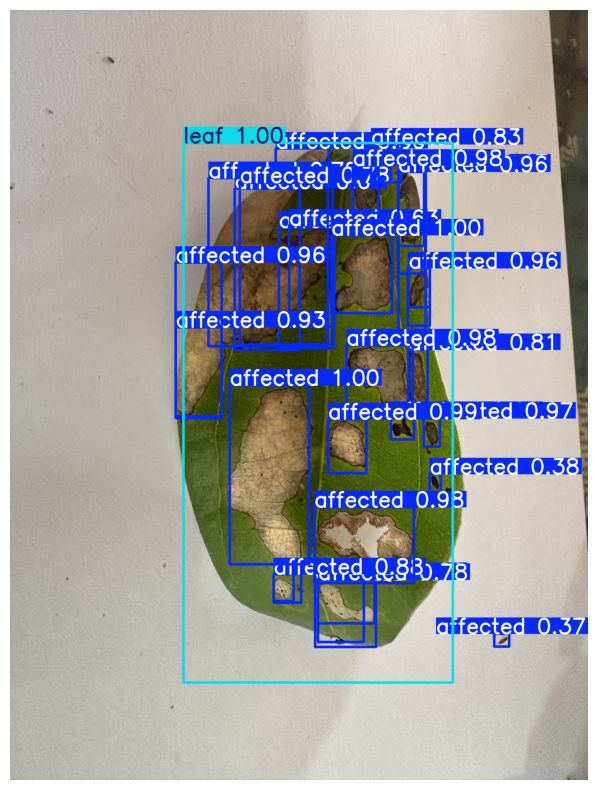

The percentage of 'affected' area compared to 'leaf' area : 36.16%


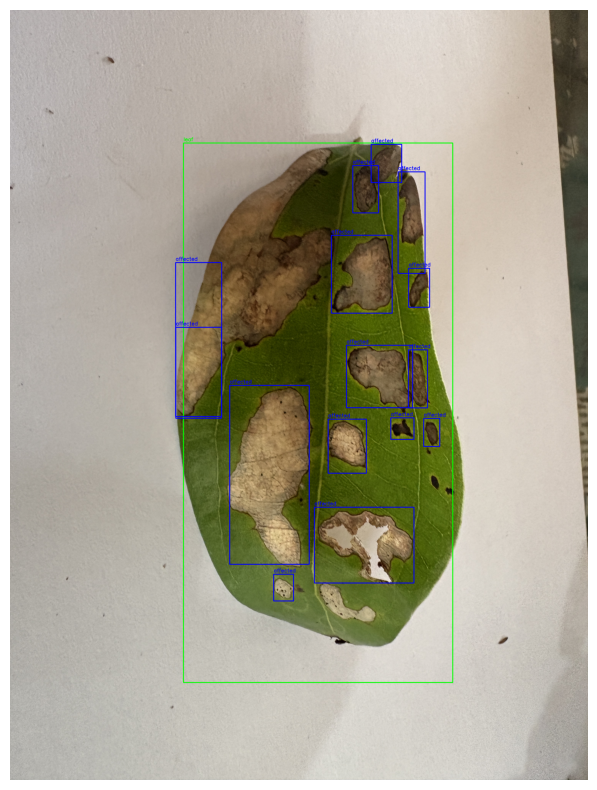

In [8]:
percentage =get_area_percentage(image_path, leaf_bligh_model)

In [9]:
percentage

3.22